In [1]:
%matplotlib inline
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
colors = ["#ef476f", "#fcbf49", "#06d6a0", "#118ab2", "#073b4c"]
colors2 = list(sns.color_palette('Dark2').as_hex())

In [2]:
"""
# look_aheads = [0, 5, 10, 20, 40, 60, 80, 100, 120]
# cnn_2d = {
#     "look_ahead_0": {
#         "scaled_pos": 0.604,
#         "precision": 0.916,
#         "recall": 0.902,
#         "f1": 0.910,
#     },
#     "look_ahead_5": {
#         "scaled_pos": 0.604,
#         "precision": 0.920,
#         "recall": 0.900,
#         "f1": 0.910,
#     },
#     "look_ahead_10": {
#         "scaled_pos": 0.602,
#         "precision": 0.923,
#         "recall": 0.886,
#         "f1": 0.904,
#     },
#     "look_ahead_20": {
#         "scaled_pos": 0.601,
#         "precision": 0.920,
#         "recall": 0.890,
#         "f1": 0.904,
#     },
#     "look_ahead_40": {
#         "scaled_pos": 0.600,
#         "precision": 0.923,
#         "recall": 0.880,
#         "f1": 0.900,
#     },
#     "look_ahead_60": {
#         "scaled_pos": 0.581,
#         "precision": 0.910,
#         "recall": 0.845,
#         "f1": 0.874,
#     },
#     "look_ahead_80": {
#         "scaled_pos": 0.582,
#         "precision": 0.915,
#         "recall": 0.840,
#         "f1": 0.873,
#     },
#     "look_ahead_100": {
#         "scaled_pos": 0.570,
#         "precision": 0.902,
#         "recall": 0.820,
#         "f1": 0.856,
#     },
#     "look_ahead_120": {
#         "scaled_pos": 0.562,
#         "precision": 0.896,
#         "recall": 0.800,
#         "f1": 0.840,
#     },
# }
# cnn_v2 = {
#     "look_ahead_0": {
#         "scaled_pos": 0.597,
#         "precision": 0.896,
#         "recall": 0.907,
#         "f1": 0.901,
#     },
#     "look_ahead_5": {
#         "scaled_pos": 0.603,
#         "precision": 0.902,
#         "recall": 0.913,
#         "f1": 0.908,
#     },
#     "look_ahead_10": {
#         "scaled_pos": 0.594,
#         "precision": 0.910,
#         "recall": 0.886,
#         "f1": 0.897,
#     },
#     "look_ahead_20": {
#         "scaled_pos": 0.596,
#         "precision": 0.907,
#         "recall": 0.894,
#         "f1": 0.900,
#     },
#     "look_ahead_40": {
#         "scaled_pos": 0.584,
#         "precision": 0.901,
#         "recall": 0.870,
#         "f1": 0.885,
#     },
#     "look_ahead_60": {
#         "scaled_pos": 0.582,
#         "precision": 0.901,
#         "recall": 0.866,
#         "f1": 0.882,
#     },
#     "look_ahead_80": {
#         "scaled_pos": 0.568,
#         "precision": 0.894,
#         "recall": 0.830,
#         "f1": 0.860,
#     },
#     "look_ahead_100": {
#         "scaled_pos": 0.567,
#         "precision": 0.886,
#         "recall": 0.836,
#         "f1": 0.859,
#     },
#     "look_ahead_120": {
#         "scaled_pos": 0.568,
#         "precision": 0.904,
#         "recall": 0.811,
#         "f1": 0.850,
#     },
# }
# cnn = {
#     "look_ahead_0": {
#         "scaled_pos": 0.596,
#         "precision": 0.900,
#         "recall": 0.901,
#         "f1": 0.901,
#     },
#     "look_ahead_5": {
#         "scaled_pos": 0.596,
#         "precision": 0.913,
#         "recall": 0.887,
#         "f1": 0.900,
#     },
#     "look_ahead_10": {
#         "scaled_pos": 0.604,
#         "precision": 0.914,
#         "recall": 0.903,
#         "f1": 0.908,
#     },
#     "look_ahead_20": {
#         "scaled_pos": 0.598,
#         "precision": 0.911,
#         "recall": 0.892,
#         "f1": 0.902,
#     },
#     "look_ahead_40": {
#         "scaled_pos": 0.588,
#         "precision": 0.906,
#         "recall": 0.873,
#         "f1": 0.889,
#     },
#     "look_ahead_60": {
#         "scaled_pos": 0.571,
#         "precision": 0.898,
#         "recall": 0.830,
#         "f1": 0.861,
#     },
#     "look_ahead_80": {
#         "scaled_pos": 0.569,
#         "precision": 0.893,
#         "recall": 0.833,
#         "f1": 0.860,
#     },
#     "look_ahead_100": {
#         "scaled_pos": 0.573,
#         "precision": 0.911,
#         "recall": 0.816,
#         "f1": 0.856,
#     },
#     "look_ahead_120": {
#         "scaled_pos": 0.564,
#         "precision": 0.902,
#         "recall": 0.797,
#         "f1": 0.840,
#     },
# }
# feature = {
#     "look_ahead_0": {
#         "scaled_pos": 0.592,
#         "precision": 0.907,
#         "recall": 0.884,
#         "f1": 0.895,
#     },
#     "look_ahead_5": {
#         "scaled_pos": 0.591,
#         "precision": 0.904,
#         "recall": 0.885,
#         "f1": 0.894,
#     },
#     "look_ahead_10": {
#         "scaled_pos": 0.590,
#         "precision": 0.899,
#         "recall": 0.890,
#         "f1": 0.894,
#     },
#     "look_ahead_20": {
#         "scaled_pos": 0.592,
#         "precision": 0.908,
#         "recall": 0.881,
#         "f1": 0.894,
#     },
#     "look_ahead_40": {
#         "scaled_pos": 0.589,
#         "precision": 0.908,
#         "recall": 0.876,
#         "f1": 0.891,
#     },
#     "look_ahead_60": {
#         "scaled_pos": 0.584,
#         "precision": 0.903,
#         "recall": 0.866,
#         "f1": 0.883,
#     },
#     "look_ahead_80": {
#         "scaled_pos": 0.579,
#         "precision": 0.901,
#         "recall": 0.854,
#         "f1": 0.876,
#     },
#     "look_ahead_100": {
#         "scaled_pos": 0.573,
#         "precision": 0.895,
#         "recall": 0.843,
#         "f1": 0.867,
#     },
#     "look_ahead_120": {
#         "scaled_pos": 0.571,
#         "precision": 0.900,
#         "recall": 0.830,
#         "f1": 0.860,
#     },
# }
# feature = {
#     "look_ahead_0": {
#         "scaled_pos": 0.592,
#         "precision": 0.907,
#         "recall": 0.884,
#         "f1": 0.895,
#     },
#     "look_ahead_5": {
#         "scaled_pos": 0.591,
#         "precision": 0.904,
#         "recall": 0.885,
#         "f1": 0.894,
#     },
#     "look_ahead_10": {
#         "scaled_pos": 0.590,
#         "precision": 0.899,
#         "recall": 0.890,
#         "f1": 0.894,
#     },
#     "look_ahead_20": {
#         "scaled_pos": 0.592,
#         "precision": 0.908,
#         "recall": 0.881,
#         "f1": 0.894,
#     },
#     "look_ahead_40": {
#         "scaled_pos": 0.589,
#         "precision": 0.908,
#         "recall": 0.876,
#         "f1": 0.891,
#     },
#     "look_ahead_60": {
#         "scaled_pos": 0.584,
#         "precision": 0.903,
#         "recall": 0.866,
#         "f1": 0.883,
#     },
#     "look_ahead_80": {
#         "scaled_pos": 0.579,
#         "precision": 0.901,
#         "recall": 0.854,
#         "f1": 0.876,
#     },
#     "look_ahead_100": {
#         "scaled_pos": 0.573,
#         "precision": 0.895,
#         "recall": 0.843,
#         "f1": 0.867,
#     },
#     "look_ahead_120": {
#         "scaled_pos": 0.571,
#         "precision": 0.900,
#         "recall": 0.830,
#         "f1": 0.860,
#     },
# }
# feature = {
#     "look_ahead_0": {
#         "scaled_pos": 0.592,
#         "precision": 0.907,
#         "recall": 0.884,
#         "f1": 0.895,
#     },
#     "look_ahead_5": {
#         "scaled_pos": 0.591,
#         "precision": 0.904,
#         "recall": 0.885,
#         "f1": 0.894,
#     },
#     "look_ahead_10": {
#         "scaled_pos": 0.590,
#         "precision": 0.899,
#         "recall": 0.890,
#         "f1": 0.894,
#     },
#     "look_ahead_20": {
#         "scaled_pos": 0.592,
#         "precision": 0.908,
#         "recall": 0.881,
#         "f1": 0.894,
#     },
#     "look_ahead_40": {
#         "scaled_pos": 0.589,
#         "precision": 0.908,
#         "recall": 0.876,
#         "f1": 0.891,
#     },
#     "look_ahead_60": {
#         "scaled_pos": 0.584,
#         "precision": 0.903,
#         "recall": 0.866,
#         "f1": 0.883,
#     },
#     "look_ahead_80": {
#         "scaled_pos": 0.579,
#         "precision": 0.901,
#         "recall": 0.854,
#         "f1": 0.876,
#     },
#     "look_ahead_100": {
#         "scaled_pos": 0.573,
#         "precision": 0.895,
#         "recall": 0.843,
#         "f1": 0.867,
#     },
#     "look_ahead_120": {
#         "scaled_pos": 0.571,
#         "precision": 0.900,
#         "recall": 0.830,
#         "f1": 0.860,
#     },
# }
"""
feature_v2 = {
    "look_ahead_0": {
        "scaled_pos": 0.592,
        "precision": 0.907,
        "recall": 0.884,
        "f1": 0.895,
    },
    "look_ahead_5": {
        "scaled_pos": 0.591,
        "precision": 0.904,
        "recall": 0.885,
        "f1": 0.894,
    },
    "look_ahead_10": {
        "scaled_pos": 0.590,
        "precision": 0.899,
        "recall": 0.890,
        "f1": 0.894,
    },
    "look_ahead_20": {
        "scaled_pos": 0.592,
        "precision": 0.908,
        "recall": 0.881,
        "f1": 0.894,
    },
    "look_ahead_40": {
        "scaled_pos": 0.589,
        "precision": 0.908,
        "recall": 0.876,
        "f1": 0.891,
    },
    "look_ahead_60": {
        "scaled_pos": 0.584,
        "precision": 0.903,
        "recall": 0.866,
        "f1": 0.883,
    },
    "look_ahead_80": {
        "scaled_pos": 0.579,
        "precision": 0.901,
        "recall": 0.854,
        "f1": 0.876,
    },
    "look_ahead_100": {
        "scaled_pos": 0.573,
        "precision": 0.895,
        "recall": 0.843,
        "f1": 0.867,
    },
    "look_ahead_120": {
        "scaled_pos": 0.571,
        "precision": 0.900,
        "recall": 0.830,
        "f1": 0.860,
    },
}

In [3]:
def get_lists(d: dict):
    scaled_pos = []
    precision = []
    recall = []
    f1 = []
    for key, val in d.items():
        for k, v in val.items():
            if k == "scaled_pos":
                scaled_pos.append(v)
            elif k == "precision":
                precision.append(v)
            elif k == "recall":
                recall.append(v)
            elif k == "f1":
                f1.append(v)
    return scaled_pos, precision, recall, f1

In [4]:
base_dir = 'outputs/signal_window_16'
root_dir = os.path.dirname(os.getcwd())
base_path = os.path.join(root_dir, base_dir)
def get_roc_data(base_path:str, model_name: str, look_ahead:int=0):
    path = os.path.join(base_path, f'label_look_ahead_{look_ahead}', 'roc')
    csv_file_path = os.path.join(path, f'{model_name}_roc_details_micro_unbalanced_lookahead_{look_ahead}.csv')
    df = pd.read_csv(csv_file_path)
    df = df.loc[1:, :]
    return df

In [5]:
# cnn_2d_scaled_pos, cnn_2d_precision, cnn_2d_recall, cnn_2d_f1 = get_lists(
#         cnn_2d
#     )
# cnn_v2_scaled_pos, cnn_v2_precision, cnn_v2_recall, cnn_v2_f1 = get_lists(
#     cnn_v2
# )
# cnn_scaled_pos, cnn_precision, cnn_recall, cnn_f1 = get_lists(cnn)
# feature_scaled_pos, feature_precision, feature_recall, feature_f1 = get_lists(feature)

In [6]:
# fig = plt.figure(figsize=(8, 6))
# # plt.plot(look_aheads, cnn_2d_scaled_pos, color=colors[0], lw=2, label="cnn_2d")
# # plt.plot(look_aheads, cnn_v2_scaled_pos, color=colors[1], lw=2, label="cnn_v2")
# # plt.plot(look_aheads, cnn_scaled_pos, color=colors[2], lw=2, label="cnn")
# # plt.plot(look_aheads, feature_scaled_pos, color=colors[3], lw=2, label="feature")
# plt.plot(look_aheads, feature_scaled_pos, color=colors[0], lw=2, label="feature_v2")
# plt.xlabel('look ahead', fontsize=14)
# plt.ylabel(r'$\frac{log(tp)}{log(fp) + log(fn)}$', fontsize=14)
# plt.legend(frameon=False)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# # plt.title('Scaled true positives as a function of look ahead', fontsize=18)
# plt.show()

In [7]:
# fig = plt.figure(figsize=(8, 6))
# plt.plot(look_aheads, cnn_2d_precision, color=colors[0], lw=2, label="cnn_2d")
# plt.plot(look_aheads, cnn_v2_precision, color=colors[1], lw=2, label="cnn_v2")
# plt.plot(look_aheads, cnn_precision, color=colors[2], lw=2, label="cnn")
# plt.plot(look_aheads, feature_precision, color=colors[3], lw=2, label="feature")
# plt.xlabel('look ahead', fontsize=14)
# plt.ylabel('precision', fontsize=14)
# plt.legend(frameon=False)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# # plt.title('Precision as a function of look ahead', fontsize=18)
# plt.show()

In [8]:
# fig = plt.figure(figsize=(8, 6))
# plt.plot(look_aheads, cnn_2d_recall, color=colors[0], lw=2, label="cnn_2d")
# plt.plot(look_aheads, cnn_v2_recall, color=colors[1], lw=2, label="cnn_v2")
# plt.plot(look_aheads, cnn_recall, color=colors[2], lw=2, label="cnn")
# plt.plot(look_aheads, feature_recall, color=colors[3], lw=2, label="feature")
# plt.xlabel('look ahead', fontsize=14)
# plt.ylabel('recall', fontsize=14)
# plt.legend(frameon=False)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# # plt.title('Recall as a function of look ahead', fontsize=18)
# plt.show()

In [9]:
# fig = plt.figure(figsize=(8, 6))
# plt.plot(look_aheads, cnn_2d_f1, color=colors[0], lw=2, label="cnn_2d")
# plt.plot(look_aheads, cnn_v2_f1, color=colors[1], lw=2, label="cnn_v2")
# plt.plot(look_aheads, cnn_f1, color=colors[2], lw=2, label="cnn")
# plt.plot(look_aheads, feature_f1, color=colors[3], lw=2, label="feature")
# plt.xlabel('look ahead', fontsize=14)
# plt.ylabel('f1-score', fontsize=14)
# plt.legend(frameon=False)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# # plt.title('F1-score as a function of look ahead', fontsize=18)
# plt.show()

In [10]:
look_aheads_new = [0, 20, 40, 60, 80, 100, 150]

In [11]:
dfs = {}
for la in look_aheads_new:
    dfs[la] = get_roc_data(base_path, model_name='feature_v2', look_ahead=la)
dfs[0].head()

,fpr,tpr,threshold
1,0.0,0.000053,0.999989
2,0.0,0.004318,0.999752
3,0.0,0.004423,0.999752
4,0.0,0.007425,0.999593
5,0.0,0.007635,0.999590


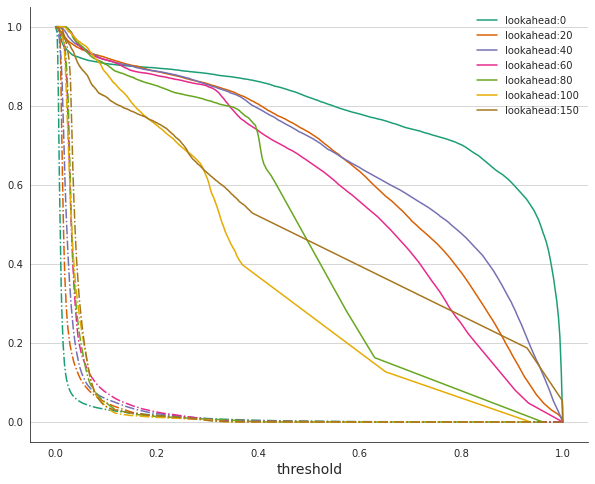

In [18]:
fig = plt.figure(figsize=(10, 8))
for i, c in zip(look_aheads_new, colors2[:len(look_aheads_new)]):
    plt.plot(dfs[i].threshold, dfs[i].tpr, '-', c=c, label=f'lookahead:{i}')
    plt.plot(dfs[i].threshold, dfs[i].fpr, '-.', c=c)
plt.legend(frameon=False, fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.xlabel('threshold', fontsize=14)
plt.grid(axis='y')
plt.show()

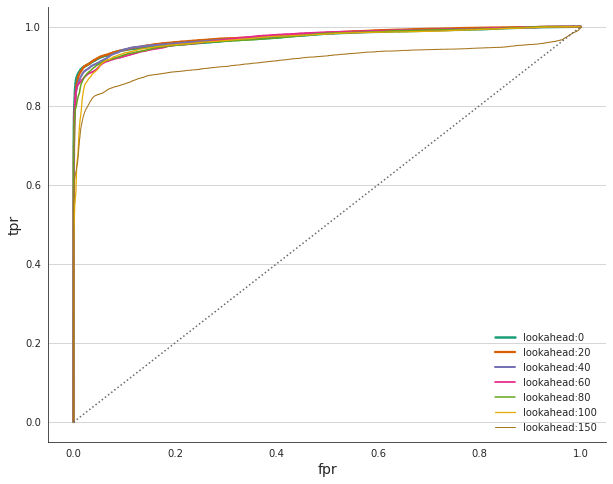

In [16]:
linewidth = [2.5, 2.25, 2, 1.75, 1.5, 1.25, 1]
fig = plt.figure(figsize=(10, 8))
for i, c, t in zip(look_aheads_new, colors2[:len(look_aheads_new)], linewidth):
    plt.plot(dfs[i].fpr, dfs[i].tpr, '-', c=c, label=f'lookahead:{i}', lw=t)
plt.plot([0, 1], [0, 1], ':', c=colors2[-1])
plt.xlabel('fpr', fontsize=14)
plt.ylabel('tpr', fontsize=14)
plt.legend(frameon=False, fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.grid(axis='y')
plt.show()